# Problem Set 4


## Question 1

As in [Applied Linear Algebra](https://datascience.quantecon.org/../scientific/applied_linalg.html):

Consider an economy where in any given year, $ \alpha = 4\% $ of current employed workers lose their jobs and
$ \phi = 15\% $ of unemployed workers find jobs.

Define the vector $ x_0 = \begin{bmatrix} 650,000 & 150,000 \end{bmatrix} $ as the number of
employed and unemployed workers (respectively) at time $ 0 $ in the economy.

Adapting the code from the lecture notes, plot the unemployment rate over time in this economy for $ t = 0, \ldots 20 $ (i.e. number of unemployed over the total number of workers).

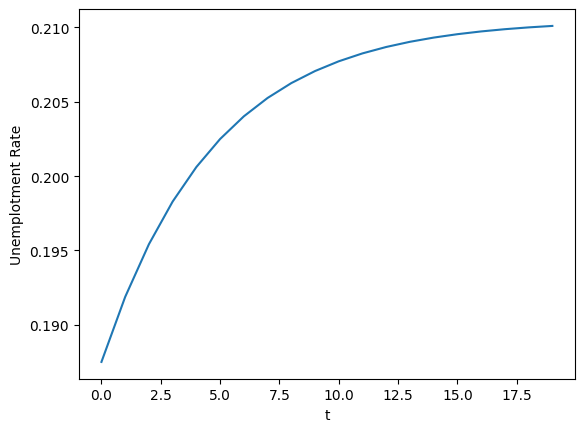

In [2]:
import numpy as np
import matplotlib.pyplot as plt

phi = 0.15
alpha = 0.04
x0 = np.array([650_000, 150_000])
A1 = np.array([[1-alpha, alpha], [phi, 1-phi]])


def simulate(initialRate, A, T=20):
    nX = initialRate.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = initialRate
    unemploymentRates = np.zeros((T))
    unemploymentRates[0] = initialRate[1]/(initialRate[0]+initialRate[1])
    for t in range(1, T):
        out[t, :] = A.T @ out[t-1, :]
        unemploymentRates[t] = out[t][1]/(out[t][0]+out[t][1])
    return unemploymentRates


# Plotting
def plotData(data):
    plt.plot(data)
    plt.xlabel("t")
    plt.ylabel("Unemplotment Rate")
    plt.show()


result = simulate(x0, A1)
plotData(result)


Continue the simulation for 1000 periods to find a long-run unemployment rate (when it converges).

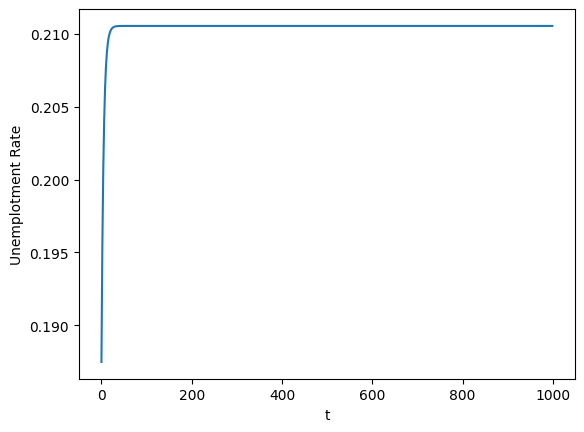

In [3]:
# your code here
resultTo1000 = simulate(x0, A1, 1000)
plotData(resultTo1000)


## Question 2

Wikipedia and other credible statistics sources tell us that the mean and
variance of the Uniform(0, 1) distribution are (1/2, 1/12) respectively.

How could we check whether the Numpy random numbers approximate these
values? (*hint*: some functions in [Introduction to Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html) and [Randomness](https://datascience.quantecon.org/../scientific/randomness.html) might be useful)

Please only use the functions in the Numpy package (i.e., don't use `scipy.stats`) to answer this question.

In [18]:
# your code here
import numpy as np

def varianceCalculator(data):
    variance = 0
    mean = np.average(data)

    for datum in data:
        variance += (datum - mean)**2
    variance /= (len(data)-1)
    return variance


inputData = np.random.rand(100000)
print(f"Variance: {varianceCalculator(inputData)}")


Variance: 0.08307769690377953


## Question 3

Assume you have been given the opportunity to choose between one of three financial assets.

You will be given the asset for free, allowed to hold it indefinitely, and will keep all payoffs.

Also assume the assets’ payoffs are distributed as follows (the notations are the same as in “Continuous Distributions” subsection of [Randomness](https://datascience.quantecon.org/../scientific/randomness.html)):

1. Normal with $ \mu = 10, \sigma = 5 $  
1. Gamma with $ k = 5.3, \theta = 2 $  
1. Gamma with $ k = 5, \theta = 2 $  


Use `scipy.stats` to answer the following questions:

- Which asset has the highest average returns?  
- Which asset has the highest median returns?  
- Which asset has the lowest coefficient of variation, i.e., standard deviation divided by mean?  
- Which asset would you choose? Why? (There is not a single right answer here. Just be creative and express your preferences.)  


You can find the official documentation of `scipy.stats` [here](https://docs.scipy.org/doc/scipy/reference/stats.html)

[-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991 -4.8998999  -4.88988989
 -4.87987988 -4.86986987 -4.85985986 -4.84984985 -4.83983984 -4.82982983
 -4.81981982 -4.80980981 -4.7997998  -4.78978979 -4.77977978 -4.76976977
 -4.75975976 -4.74974975 -4.73973974 -4.72972973 -4.71971972 -4.70970971
 -4.6996997  -4.68968969 -4.67967968 -4.66966967 -4.65965966 -4.64964965
 -4.63963964 -4.62962963 -4.61961962 -4.60960961 -4.5995996  -4.58958959
 -4.57957958 -4.56956957 -4.55955956 -4.54954955 -4.53953954 -4.52952953
 -4.51951952 -4.50950951 -4.4994995  -4.48948949 -4.47947948 -4.46946947
 -4.45945946 -4.44944945 -4.43943944 -4.42942943 -4.41941942 -4.40940941
 -4.3993994  -4.38938939 -4.37937938 -4.36936937 -4.35935936 -4.34934935
 -4.33933934 -4.32932933 -4.31931932 -4.30930931 -4.2992993  -4.28928929
 -4.27927928 -4.26926927 -4.25925926 -4.24924925 -4.23923924 -4.22922923
 -4.21921922 -4.20920921 -4.1991992  -4.18918919 -4

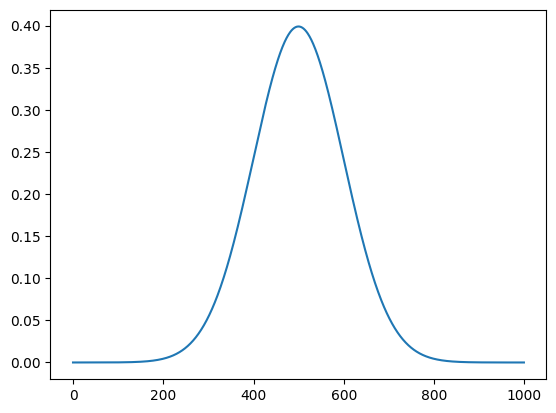

In [25]:
# your code here
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

theList = np.linspace(-5,5,1000)
print(theList)

x = st.norm(0,1).pdf(theList)
print(x)
plt.plot(x)
plt.show()

# def averageReturnCalculator():
    

## Question 4

Take the example with preferences over bananas (B) and apples (A) in [Optimization](https://datascience.quantecon.org/../scientific/optimization.html)

The consumer solves the following problem:

$$
\begin{aligned}
\max_{A, B} & B^{\alpha}A^{1-\alpha}\\
\text{s.t. } & p_A A + B \leq W
\end{aligned}
$$

Fix $ p_A = 2 $ and $ \alpha = 0.3 $.  Make a grid of `W` between `1` and `3` and then plot the optimal ratio of B to A.

<Axes: xlabel='B', ylabel='A'>

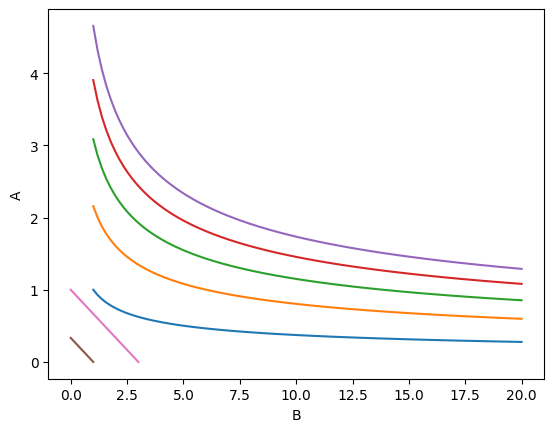

In [64]:
import scipy.optimize import minimize_scalar

p_A1 = 3
alpha1 = 0.3
B = np.linspace(1, 20, 100).reshape((100, 1))


def U(B, A, alpha):
    return B**alpha*A(1-alpha)


def indiffeceCalculator(B, Ubar, alpha):
    return Ubar**(1/1-alpha)*B**(-alpha/(1-alpha))


def budgetConstraint(W, B, p_A):
    return (W-B)/p_A


def objective(B, W, pa):
    A = budgetConstraint(B, W, pa)
    return -U(A, B)

result = 

# def plot_indifference(ax, alpha):
#     uBarValues = np.arange(1, 11, 2)
#     ax.plot(B, indiffeceCalculator(B, uBarValues, alpha))
#     ax.set_xlabel("B")
#     ax.set_ylabel("A")


# def plot_budgetConstraint(ax, W1, W2, p_A):
#     Bs1 = np.array([0, W1])
#     A1 = budgetConstraint(W1, Bs1, p_A)
#     Bs2 = np.array([0, W2])
#     A2 = budgetConstraint(W2, Bs2, p_A)
#     ax.plot(Bs1, A1)
#     ax.plot(Bs2, A2)
#     return ax


# fig, ax = plt.subplots()
# plot_indifference(ax, alpha1)
# plot_budgetConstraint(ax, 1, 3, 3)


Do the same graph for $ \alpha = 0.5 $ **and compare/interpret.**

In [5]:
# Your code here

## Question 5

Suppose that you own a mobile app that has a "freemium" pricing policy, and you want to model how the behavior of your users depends on the monthly subscription price that you charge.

The population of your potential app users are distributed between three states; Non-users, Free users, and Premium users. **All users begin as Non-users**; a Non-user will never go directly from being a Non-user to being a Premium user, without first trying the app out as a Free user for at least one month. In each month, 5\% of the Non-users will decide to try the app in the next month.

In every time period, 0.5\% of the Free users tend to leave the app and become Non-users again. After those users switch, some of the remaining users will choose to subscribe to the app in a given month (and transfer from the Free user category to the Premium user category). The probability that a Free user who did not already leave the app chooses to subscribe for the next month depends on the monthly price that you charge. If the monthly price is represented by a positive number $p$, then the probability of subscribing is given by $$\mathbb{P}\left[ \text{Free user chooses to subscribe to Premium}\right] = \frac{1-\mathbb{P[\text{Free user chooses to leave the app}]}}{1+p}.$$

Finally, every month 5\% of Premium users will cancel their subscriptions, and 1\%  of Premium users will delete the app and become Non-users again.



Define a function `transition_matrix` over prices $p$, whose output is a row-stochastic version of the matrix that describes the transition probabilities in this economy.

Write another function called `iterate` that takes as arguments $p$ and $t$, where $t$ is the number of months and takes a default value of 6 months, and outputs the distribution of users into categories after $t$ months.

In [ ]:
# your code here

Create a figure with three subplots arranged horizontally. On each subplot, show the evolution of your distribution of users over the first year of your new app. Each figure should have time $t$ as the x-axis, and the y-axis should track the proportions of users in each category, for a specific price. On these axes, show how the number of users in each category changes over time with a monthly price equal to $p=0.10$, $p=2$, and $p=20$, respectively. Make sure to clearly label your lines, axes, and subplots.

In [ ]:
# your code here

Which of the above prices yields the most premium users after one year? Is this surprising? Why or why not?